# 1 Introduction

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

movie_reviews = pd.read_csv("fandango_score_comparison.csv")
print(movie_reviews.columns)
movie_reviews

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


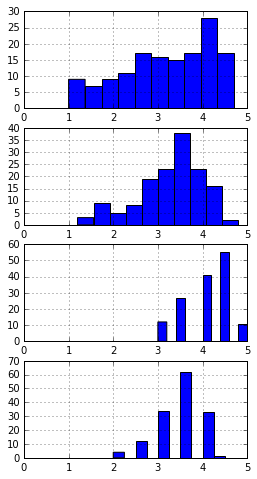

In [2]:
fig = plt.figure(figsize=(4,8))

ax1 = fig.add_subplot(4,1,1)
ax1.set_xlim([0,5])
ax1 = movie_reviews['RT_user_norm'].hist()


ax2 = fig.add_subplot(4,1,2)
ax2.set_xlim([0,5])
ax2 = movie_reviews['Metacritic_user_nom'].hist()

ax3 = fig.add_subplot(4,1,3)
ax3.set_xlim([0,5])
ax3 = movie_reviews['Fandango_Stars'].hist()

ax4 = fig.add_subplot(4,1,4)
ax4.set_xlim([0,5])
ax4 = movie_reviews['IMDB_norm_round'].hist()




# 2. Mean

In [3]:
def calc_mean(serie):
    mean = 0
    for value in serie:
        mean += value
    return mean / len(serie)
    
# print(calc_mean(movie_reviews['Fandango_Stars']) )  
user_reviews = movie_reviews[['RT_user_norm', 'Metacritic_user_nom', 'Fandango_Ratingvalue', 'IMDB_norm']] 
# print(user_reviews.mean())
rt_mean = calc_mean(user_reviews['RT_user_norm'])
mc_mean = calc_mean(user_reviews['Metacritic_user_nom'])
fg_mean = calc_mean(user_reviews['Fandango_Ratingvalue'])
id_mean = calc_mean(user_reviews['IMDB_norm'])
print(rt_mean, mc_mean, fg_mean, id_mean)
        

3.19383561644 3.2595890411 3.84520547945 3.36849315068


# 3: Variance And Standard Deviation

In [22]:
def calc_variance(serie):
    mean = calc_mean(serie)
    return calc_mean((serie - mean)**2)

rt_var = calc_variance(user_reviews['RT_user_norm'])
rt_stdev = rt_var**(1/2)
mc_var = calc_variance(user_reviews['Metacritic_user_nom'])
mc_stdev = mc_var**(1/2)
fg_var = calc_variance(user_reviews['Fandango_Ratingvalue'])
fg_stdev = fg_var**(1/2)
id_var = calc_variance(user_reviews['IMDB_norm'])
id_stdev = id_var**(1/2)

print('RT', rt_var, rt_stdev)
print('MC', mc_var, mc_stdev)
print('FG', fg_var, fg_stdev)
print('ID', id_var, id_stdev)


RT 0.995578438731 0.997786770173
MC 0.566654625633 0.752764654878
FG 0.251107149559 0.501105926486
ID 0.228219647213 0.47772340032


# 4: Scatter Plots

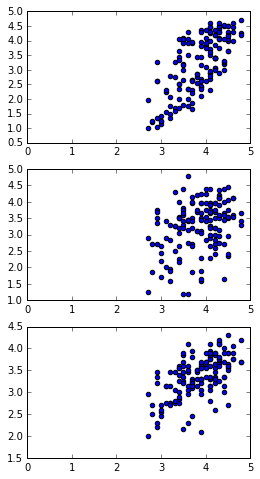

In [36]:
fig = plt.figure(figsize=(4,8))

ax1 = fig.add_subplot(3,1,1)
ax1.set_xlim([0,5.0])
ax1.scatter(user_reviews['Fandango_Ratingvalue'], user_reviews['RT_user_norm'])

ax2 = fig.add_subplot(3,1,2)
ax2.set_xlim([0,5.0])
ax2.scatter(user_reviews['Fandango_Ratingvalue'], user_reviews['Metacritic_user_nom'])

ax3 = fig.add_subplot(3,1,3)
ax3.set_xlim([0,5.0])
ax3.scatter(user_reviews['Fandango_Ratingvalue'], user_reviews['IMDB_norm'])


# 5: Covariance

In [43]:
def calc_covariance(x, y):
    x_diff = [i - calc_mean(x) for i in x]
    y_diff = [i - calc_mean(y) for i in y]
    xy_diff = [x_diff[i] * y_diff[i] for i in range(len(x))]
    return sum(xy_diff) / len(x)

rt_fg_covar = calc_covariance(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_covar = calc_covariance(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_covar = calc_covariance(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

print("Covariance between Rotten Tomatoes and Fandango:", rt_fg_covar)
print("Covariance between Metacritic and Fandango", mc_fg_covar)
print("Covariance between IMDB and Fandango", id_fg_covar)

Covariance between Rotten Tomatoes and Fandango: 0.362162225558
Covariance between Metacritic and Fandango 0.127100769375
Covariance between IMDB and Fandango 0.143718802777


# 6: Correlation

In [53]:
def calc_correlation(series_one, series_two):
    numerator = calc_covariance(series_one, series_two)
    series_one_std = calc_variance(series_one) ** (1/2)
    series_two_std = calc_variance(series_two) ** (1/2)
    denominator = series_one_std * series_two_std
    correlation = numerator / denominator
    return correlation

rt_fg_corr = calc_correlation(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_corr = calc_correlation(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_corr = calc_correlation(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

print("Correlation between Rotten Tomatoes and Fandango", rt_fg_corr)
print("Correlation between Metacritic and Fandango", mc_fg_corr)
print("Correlation between IMDB and Fandango", id_fg_corr)

Correlation between Rotten Tomatoes and Fandango 0.724328994249
Correlation between Metacritic and Fandango 0.336945314265
Correlation between IMDB and Fandango 0.600354177263
